In [1]:
import os
from src. visualization import plot_images_from_tensor
from src.utils import check_GPU_is_available
from src import create_data_loader

2024-03-22 19:12:10.455788: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-22 19:12:10.492370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 19:12:11.159133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
check_GPU_is_available()

Tensorflow was built with GPU support.
Num of visible GPU(s): 0
Device(s) name(s): []


2024-03-22 19:12:11.818724: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
dataset_tfrecords_path = "./datasets/div2k/bicubic_x4/2.0.0"
assert os.path.exists(dataset_tfrecords_path), print("Can't find dataset at the expected directory, please run 'download_dataset.py' first")

## Spawn Train/Validation loaders

In [4]:
train_tfrecords = [os.path.join(dataset_tfrecords_path, x) for x in os.listdir(dataset_tfrecords_path) if "train" in x]
valid_tfrecords = [os.path.join(dataset_tfrecords_path, x) for x in os.listdir(dataset_tfrecords_path) if "validation" in x]
train_dataloader = create_data_loader(train_tfrecords, batch_size=9,train_mode=True)
valid_dataloader = create_data_loader(valid_tfrecords, batch_size=9,train_mode=False)
print("Train tf records: {} - Validation tf records: {}".format(len(train_tfrecords), len(valid_tfrecords)))

Train tf records: 32 - Validation tf records: 4


### Train dataloader

2024-03-22 19:12:12.484554: E tensorflow/core/util/util.cc:131] oneDNN supports DT_UINT8 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
2024-03-22 19:12:13.450517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Low res image tensor shape -> (9, 24, 24, 3)
Hig res image tensor shape -> (9, 96, 96, 3)


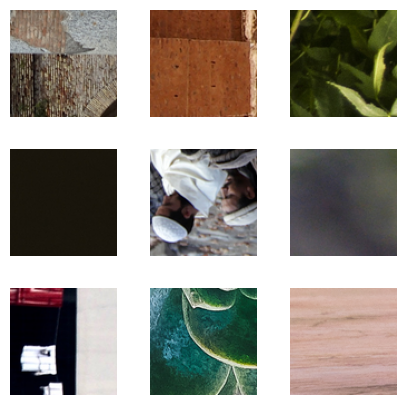

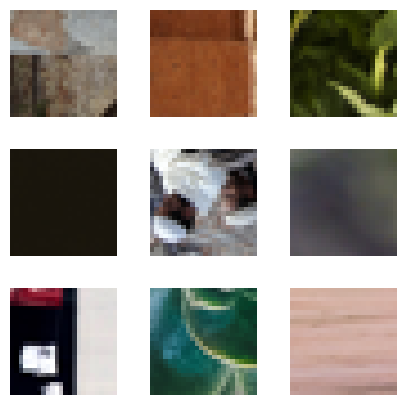

In [5]:
tensors_batch = train_dataloader.take(1)
lr_img_tensor = None
hr_img_tensor = None
for item in tensors_batch:
    lr_img_tensor, hr_img_tensor = item
print(f"Low res image tensor shape -> {lr_img_tensor.shape}\nHig res image tensor shape -> {hr_img_tensor.shape}")
plot_images_from_tensor(hr_img_tensor, num_rows=3, num_cols=3, figsize=(5, 5))
plot_images_from_tensor(lr_img_tensor, num_rows=3, num_cols=3, figsize=(5, 5))

### Valid dataloader

2024-03-22 19:12:14.063599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Low res image tensor shape -> (9, 24, 24, 3)
Hig res image tensor shape -> (9, 96, 96, 3)


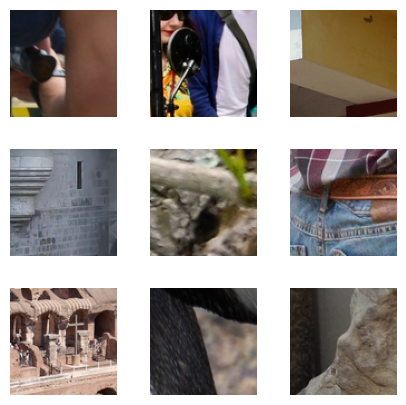

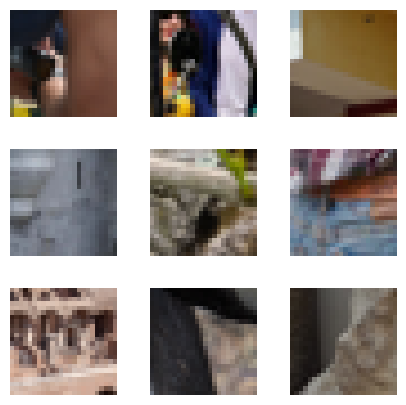

In [6]:
tensors_batch = valid_dataloader.take(1)
lr_img_tensor = None
hr_img_tensor = None
for item in tensors_batch:
    lr_img_tensor, hr_img_tensor = item
print(f"Low res image tensor shape -> {lr_img_tensor.shape}\nHig res image tensor shape -> {hr_img_tensor.shape}")
plot_images_from_tensor(hr_img_tensor, num_rows=3, num_cols=3, figsize=(5, 5))
plot_images_from_tensor(lr_img_tensor, num_rows=3, num_cols=3, figsize=(5, 5))